In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import math

In [2]:
from scipy import stats

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [5]:
import seaborn_figure_settings

In [6]:
morder = [#'MIXOTROPH', 
          'OVERFLOW', 'EXOENZYME',  'ROS',] #take out the mixotroph model
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [7]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [89]:
save_dpath = os.path.join('../notebooks/figures/', 'ext_fig_4')
os.makedirs(save_dpath,exist_ok=True)

In [8]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = '../results/final/het'

In [9]:
os.listdir(dpath)

['monte_het_extend_100per_vpro_OVERFLOW-ROS-EXOENZYME_clean_df.csv.gz',
 'versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-EXOENZYME.csv',
 'monte_het_extend_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_clean_df.csv.gz',
 'monte_het_extend_100per_vpro_OVERFLOW-EXOENZYME_clean_df.csv.gz',
 'predicted_classes_monte_het_extend_EXOENZYME.csv.gz',
 'monte_het_extend_100per_vpro_EXOENZYME-ROS_clean_sum.csv.gz',
 'predicted_classes_monte_het_extend_100per_vpro_OVERFLOW-ROS.csv.gz',
 'cleanup_stats_monte_het_extend_MIN.csv',
 'monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH_clean_df.csv.gz',
 'monte_het_extend_ROS-MIXOTROPH_clean_df.csv.gz',
 'monte_het_extend_OVERFLOW-ROS_clean_df.csv.gz',
 'monte_add_het_clean_clean_mse.csv.gz',
 'monte_het_round2_100per_vpro_ROS_clean_sum.csv.gz',
 'stages_old',
 'monte_het_extend_EXOENZYME-ROS-MIXOTROPH_clean_df.csv.gz',
 'stages',
 'versatile_vpros_monte_het_extend_OVERFLOW.csv',
 'monte_het_extend_100per_vpro_ROS_clean_df.csv.gz',
 'cleanup_stats_monte_ROS_round2

In [10]:
fnames_predicted_classes = [
    #'predicted_classes_monte_add_het_clean.csv.gz',
    'predicted_classes_monte_het_clean.csv.gz',
    #'predicted_classes_monte_het_add_100per_vpro_EXOENZYME.csv.gz',
    #'predicted_classes_monte_het_add_100per_vpro_OVERFLOW.csv.gz',
    #'predicted_classes_monte_het_add_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_MIXOTROPH.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_het_extend_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_extend_MIXOTROPH.csv.gz',
    'predicted_classes_monte_het_extend_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_extend_ROS.csv.gz',
    'predicted_classes_monte_het_multi.csv.gz',
    #'predicted_classes_monte_het_round2_100per_vpro_ROS.csv.gz',
    #'predicted_classes_monte_ROS_round2_het.csv.gz',
]

In [11]:
fnames_sum = [
    #'monte_add_het_clean_clean_sum.csv.gz',
    #'monte_het_add_100per_vpro_EXOENZYME_clean_sum.csv.gz',
    #'monte_het_add_100per_vpro_OVERFLOW_clean_sum.csv.gz',
    #'monte_het_add_100per_vpro_ROS_clean_sum.csv.gz',
    'monte_het_clean_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_EXOENZYME_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_MIXOTROPH_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_OVERFLOW_clean_sum.csv.gz',
    'monte_het_extend_100per_vpro_ROS_clean_sum.csv.gz',
    'monte_het_extend_EXOENZYME_clean_sum.csv.gz',
    'monte_het_extend_MIXOTROPH_clean_sum.csv.gz',
    'monte_het_extend_OVERFLOW_clean_sum.csv.gz',
    'monte_het_extend_ROS_clean_sum.csv.gz',
    'monte_het_multi_clean_sum.csv.gz',
    #'monte_het_round2_100per_vpro_ROS_clean_sum.csv.gz',
    #'monte_ROS_round2_het_clean_sum.csv.gz',
]

In [12]:
sum_df = pd.concat([pd.read_csv(os.path.join(dpath, f)) for f in fnames_sum], ignore_index=True)
#sum_df = sum_df.loc[sum_df.model.]

In [13]:
sum_df = sum_df.drop(columns=['Unnamed: 0'])

In [14]:
minmse_df = pd.concat([pd.read_csv(os.path.join(dpath, f)) for f in fnames_predicted_classes], ignore_index=True)



In [15]:
vpro_df = pd.read_csv('../ML_model/versatile_vpros.csv')

In [16]:
minmse_df.VPRO = minmse_df.VPRO.str.replace('_monte_', '' ,regex=False)

In [17]:
minmse_df = minmse_df.loc[minmse_df.model.isin(morder)]

In [18]:
vpro_df = vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile & vpro_df.Phase.isin(['init', 'extend'])]

In [19]:
minmse_df.columns, vpro_df.columns

(Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
        'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
        'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
        'RMSE_filled'],
       dtype='object'),
 Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
        'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
        'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'EXOENZYME',
        'OVERFLOW', 'ROS', 'MIXOTROPH', 'MIN', '% positive', 'Versatile_STR_'],
       dtype='object'))

In [20]:
df = pd.merge(
    vpro_df[['model', 'Phase', 'VPRO', 'Versatile',]],
    minmse_df[['run_id', 'y_pred',  'VPRO', ]],
    on='VPRO', how='left')
df

,model,Phase,VPRO,Versatile,run_id,y_pred
0,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak
1,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak
2,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak
3,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak
4,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Sustained
...,...,...,...,...,...,...
41597,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_20_lowN_al...,Strong
41598,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_24_lowN_al...,Strong
41599,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_32_lowN_al...,Sustained
41600,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_52_lowN_al...,Other


In [21]:
df.isna().sum()

model        0
Phase        0
VPRO         0
Versatile    0
run_id       0
y_pred       0
dtype: int64

In [22]:
df.Versatile.value_counts()

Versatile
True    41602
Name: count, dtype: int64

In [23]:
df.Phase.value_counts()

Phase
extend    35352
init       6250
Name: count, dtype: int64

In [24]:
df.model.value_counts()


model
OVERFLOW     23598
EXOENZYME    16813
ROS           1191
Name: count, dtype: int64

In [25]:
df = pd.merge(df, sum_df, on='run_id', how='left')

In [26]:
df

,model,Phase,VPRO,Versatile,run_id,y_pred,VmaxICp,VmaxICh,VmaxINp,VmaxINh,...,Koverflowh,ROSMode,KprodROSp,KprodROSh,KlossROSp,KlossROSh,KdecayROS,omegaP,omegaH,ROSmaxD
0,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,0.000046,0.0,0.000055,0.000067,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,0.000046,0.0,0.000055,0.000067,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
2,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,0.000046,0.0,0.000055,0.000067,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
3,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,0.000046,0.0,0.000055,0.000250,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
4,EXOENZYME,extend,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,True,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Sustained,0.000046,0.0,0.000055,0.000117,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41597,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_20_lowN_al...,Strong,0.000033,0.0,0.000023,0.000067,...,0.0,1.0,3.023700e-08,1.420290e-08,3.316511e-07,0.000010,0.000003,0.000034,3.405556e-08,0.000032
41598,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_24_lowN_al...,Strong,0.000033,0.0,0.000023,0.000067,...,0.0,1.0,3.023700e-08,1.944444e-08,3.316511e-07,0.000007,0.000003,0.000034,3.405556e-08,0.000032
41599,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_32_lowN_al...,Sustained,0.000033,0.0,0.000023,0.000387,...,0.0,1.0,3.023700e-08,1.944444e-08,3.316511e-07,0.000001,0.000003,0.000034,3.405556e-08,0.000032
41600,ROS,init,vpro_19_33_ROS_C0,True,monte_ROS_9_monte_vpro_19_33_ROS_C0_52_lowN_al...,Other,0.000033,0.0,0.000023,0.000027,...,0.0,1.0,3.023700e-08,1.944444e-08,3.316511e-07,0.000008,0.000003,0.000034,2.452183e-07,0.000032


In [27]:
df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'VmaxICp',
       'VmaxICh', 'VmaxINp', 'VmaxINh', 'VmaxOCp', 'VmaxOCh', 'VmaxONp',
       'VmaxONh', 'KICp', 'KICh', 'KINp', 'KINh', 'KOCp', 'KOCh', 'KONp',
       'KONh', 'Mp', 'Mh', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'QCmaxp',
       'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp', 'Kmtbh', 'bp', 'bh', 'r0p',
       'r0h', 'KdecayDON', 'KprodEXOp', 'KprodEXOh', 'OverflowMode',
       'Koverflowp', 'Koverflowh', 'ROSMode', 'KprodROSp', 'KprodROSh',
       'KlossROSp', 'KlossROSh', 'KdecayROS', 'omegaP', 'omegaH', 'ROSmaxD'],
      dtype='object')

In [28]:
df['model'].value_counts()

model
OVERFLOW     23598
EXOENZYME    16813
ROS           1191
Name: count, dtype: int64

In [29]:
df.isna().sum()

model           0
Phase           0
VPRO            0
Versatile       0
run_id          0
y_pred          0
VmaxICp         0
VmaxICh         0
VmaxINp         0
VmaxINh         0
VmaxOCp         0
VmaxOCh         0
VmaxONp         0
VmaxONh         0
KICp            0
KICh            0
KINp            0
KINh            0
KOCp            0
KOCh            0
KONp            0
KONh            0
Mp              0
Mh              0
gammaDp         0
gammaDh         0
Rp              0
Rh              0
QCmaxp          0
QCminp          0
QCmaxh          0
QCminh          0
Kmtbp           0
Kmtbh           0
bp              0
bh              0
r0p             0
r0h             0
KdecayDON       0
KprodEXOp       0
KprodEXOh       0
OverflowMode    0
Koverflowp      0
Koverflowh      0
ROSMode         0
KprodROSp       0
KprodROSh       0
KlossROSp       0
KlossROSh       0
KdecayROS       0
omegaP          0
omegaH          0
ROSmaxD         0
dtype: int64

In [30]:
id_vars=[
    'run_id', 'y_pred', 
    'VPRO', 'model', 'Phase', 'Versatile',
       ]
def _get_params_df(model):
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    hparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'HET')
    params_to_update = pparams_to_update + hparams_to_update
    param_vals_map = get_param_vals(model)
    
    params_to_update = [p for p in params_to_update if p in df.columns]

    param_vals_df = df.loc[df.model.isin([model]), 
                                id_vars + params_to_update ]
    mparam_vals = param_vals_df.melt( 
        id_vars=id_vars,
        value_name='paramval', 
        var_name='param'
    )    
    mparam_vals['default'] = mparam_vals['param'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.paramval / mparam_vals.default)

    return mparam_vals
mparams_df = pd.concat([_get_params_df(model) for model in df.model.unique()], ignore_index=True)

In [31]:
mparams_df.describe()

,paramval,default,FC
count,6.535830e+05,6.535830e+05,653583.000000
mean,4.812037e+00,2.472265e+00,0.457468
std,2.816079e+01,9.006148e+00,1.630090
min,1.946626e-09,4.696017e-09,-3.321927
25%,1.259331e-05,5.555556e-06,-0.084678
50%,7.819677e-05,6.666667e-05,0.000000
75%,1.000000e-01,1.000000e-01,1.918848
max,3.674207e+02,3.700000e+01,3.321910


In [32]:
mparams_df.param.unique()

array(['VmaxICp', 'VmaxINp', 'KICp', 'KINp', 'Mp', 'gammaDp', 'VmaxINh',
       'VmaxOCh', 'VmaxONh', 'KINh', 'KOCh', 'KONh', 'Mh', 'gammaDh',
       'KprodEXOh', 'Koverflowp', 'Koverflowh', 'KprodROSp', 'KlossROSp',
       'omegaP', 'KprodROSh', 'KlossROSh', 'omegaH'], dtype=object)

In [33]:
mparams_df.dtypes

run_id        object
y_pred        object
VPRO          object
model         object
Phase         object
Versatile       bool
param         object
paramval     float64
default      float64
FC           float64
dtype: object

In [34]:
mparams_df['param1'] = mparams_df.param.str[:-1]

In [35]:
mparams_df['Strain'] = mparams_df.param.str[-1].map({'p' : 'PRO', 'P': 'PRO', 'h': 'HET', 'H': 'HET'})

In [36]:
mparams_df[['param1', 'y_pred','Strain']]

,param1,y_pred,Strain
0,VmaxIC,Weak,PRO
1,VmaxIC,Weak,PRO
2,VmaxIC,Weak,PRO
3,VmaxIC,Weak,PRO
4,VmaxIC,Sustained,PRO
...,...,...,...
653578,omega,Strong,HET
653579,omega,Strong,HET
653580,omega,Sustained,HET
653581,omega,Other,HET


In [37]:
#IC is too different to share
mask = mparams_df['param1'].str.endswith(('OC',  'ON', 'IN', 'IC'))

mparams_df.loc[mask, 'paramtype'] = mparams_df.loc[mask, 'param1'].str[:-2]
mparams_df.loc[mask, 'nutrient'] = mparams_df.loc[mask, 'param1'].str[-2:]
mparams_df

,run_id,y_pred,VPRO,model,Phase,Versatile,param,paramval,default,FC,param1,Strain,paramtype,nutrient
0,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,EXOENZYME,extend,True,VmaxICp,4.596274e-05,5.555556e-06,3.048462,VmaxIC,PRO,Vmax,IC
1,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,EXOENZYME,extend,True,VmaxICp,4.596274e-05,5.555556e-06,3.048462,VmaxIC,PRO,Vmax,IC
2,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,EXOENZYME,extend,True,VmaxICp,4.596274e-05,5.555556e-06,3.048462,VmaxIC,PRO,Vmax,IC
3,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Weak,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,EXOENZYME,extend,True,VmaxICp,4.596274e-05,5.555556e-06,3.048462,VmaxIC,PRO,Vmax,IC
4,monte_rerun_het_extend_vpro_3_11_62_EXOENZYME_...,Sustained,vpro_3_11_62_EXOENZYME_C1__22_EXOENZYME,EXOENZYME,extend,True,VmaxICp,4.596274e-05,5.555556e-06,3.048462,VmaxIC,PRO,Vmax,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653578,monte_ROS_9_monte_vpro_19_33_ROS_C0_20_lowN_al...,Strong,vpro_19_33_ROS_C0,ROS,init,True,omegaH,3.405556e-08,3.405556e-08,0.000000,omega,HET,NaN,NaN
653579,monte_ROS_9_monte_vpro_19_33_ROS_C0_24_lowN_al...,Strong,vpro_19_33_ROS_C0,ROS,init,True,omegaH,3.405556e-08,3.405556e-08,0.000000,omega,HET,NaN,NaN
653580,monte_ROS_9_monte_vpro_19_33_ROS_C0_32_lowN_al...,Sustained,vpro_19_33_ROS_C0,ROS,init,True,omegaH,3.405556e-08,3.405556e-08,0.000000,omega,HET,NaN,NaN
653581,monte_ROS_9_monte_vpro_19_33_ROS_C0_52_lowN_al...,Other,vpro_19_33_ROS_C0,ROS,init,True,omegaH,2.452183e-07,3.405556e-08,2.848105,omega,HET,NaN,NaN


In [38]:
mparams_df.columns

Index(['run_id', 'y_pred', 'VPRO', 'model', 'Phase', 'Versatile', 'param',
       'paramval', 'default', 'FC', 'param1', 'Strain', 'paramtype',
       'nutrient'],
      dtype='object')

In [39]:
mparams_df.param1.unique()

array(['VmaxIC', 'VmaxIN', 'KIC', 'KIN', 'M', 'gammaD', 'VmaxOC',
       'VmaxON', 'KOC', 'KON', 'KprodEXO', 'Koverflow', 'KprodROS',
       'KlossROS', 'omega'], dtype=object)

In [40]:
params_per_sec = [
    'VmaxIN', 'VmaxOC', 'VmaxON', 'VmaxIC', 'M', 
    'KprodEXO', 'Koverflow', 'KprodROS',
       'KlossROS', 'omega'
]
mask = mparams_df.param1.isin(params_per_sec)
mparams_df.loc[mask, 'paramval'] = mparams_df.loc[mask, 'paramval'] * seconds_in_day

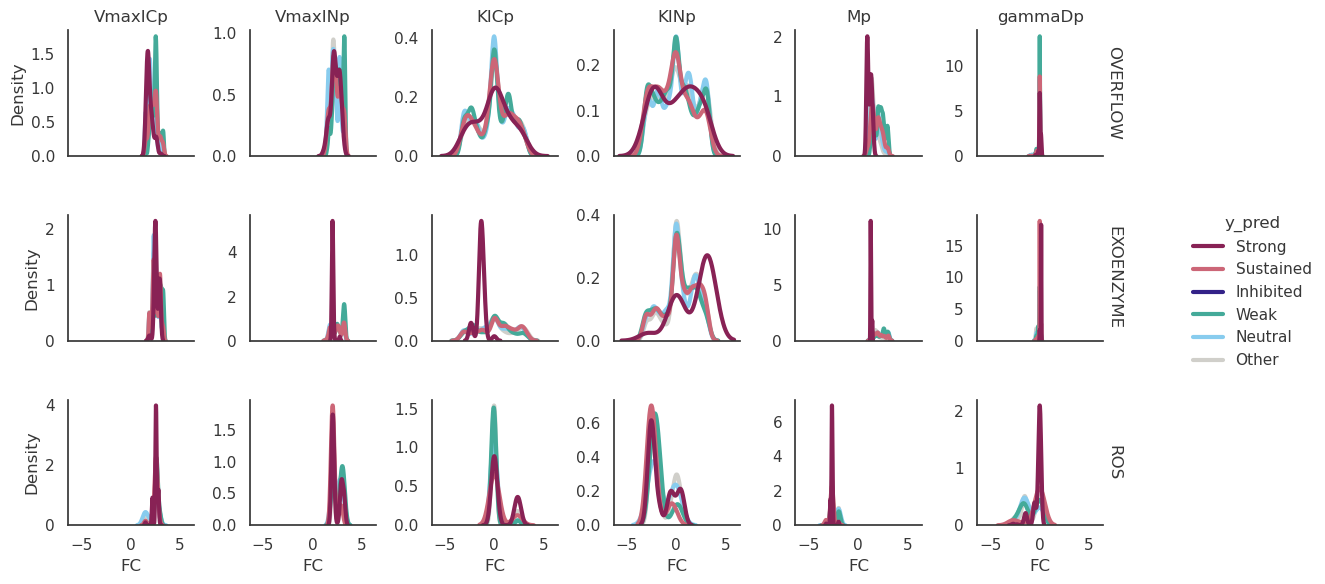

In [73]:
cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')
sns.displot(
    data=mparams_df.loc[ 
        #~mparams_df['FC'].isna() & 
        mparams_df['param'].isin(cur_pro_params_to_update) &
        mparams_df['model'].isin(morder) &
        ~mparams_df['y_pred'].isin(['Inhibited']) 

                       ].reset_index(), 
    common_norm=False,
    col='param', x='FC', col_order=cur_pro_params_to_update,
    row='model', row_order=morder,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    kind='kde',
    facet_kws=dict(sharey=False, margin_titles=True),
    height=2,
    lw=3,
).set_titles(col_template='{col_name}', row_template='{row_name}')


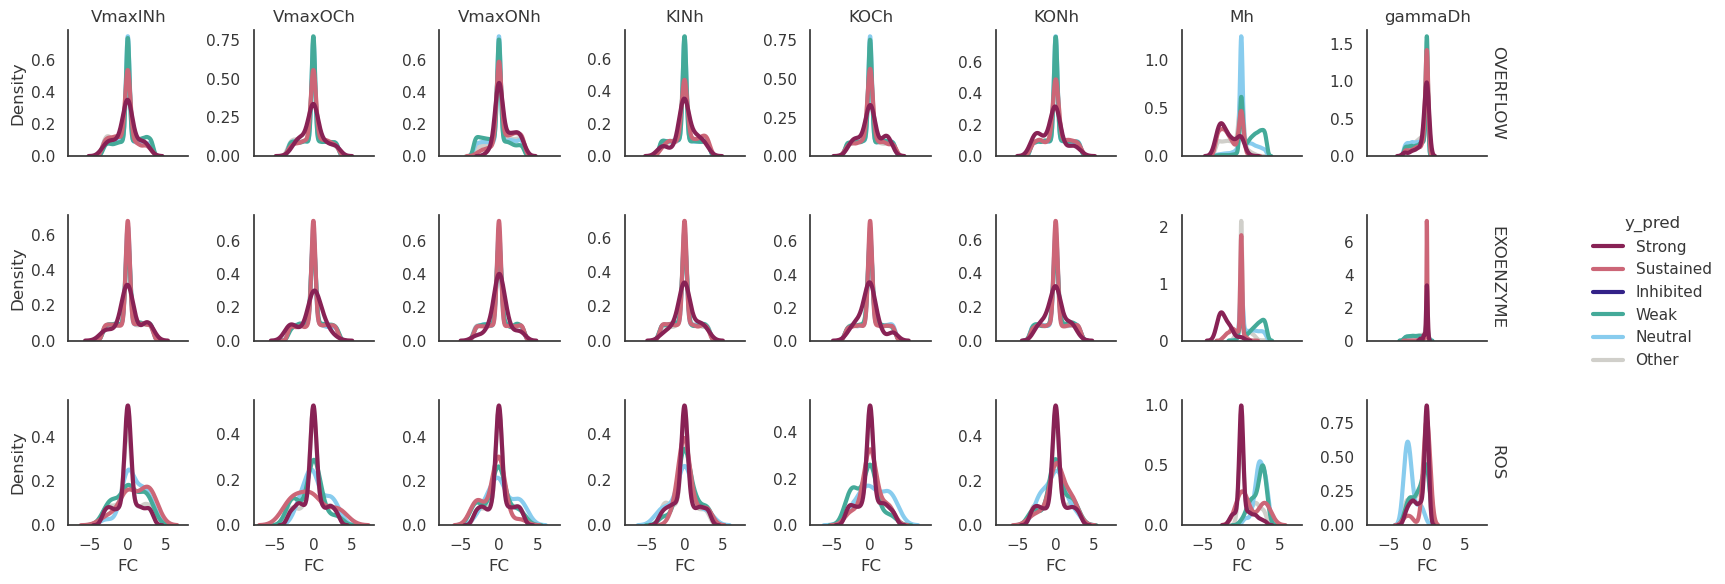

In [74]:
cur_het_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'HET')
sns.displot(
    data=mparams_df.loc[ 
        #~mparams_df['FC'].isna() & 
        mparams_df['param'].isin(cur_het_params_to_update) &
        mparams_df['model'].isin(morder) &
        ~mparams_df['y_pred'].isin(['Inhibited']) 

                       ].reset_index(), 
    common_norm=False,
    col='param', x='FC', col_order=cur_het_params_to_update,
    row='model', row_order=morder,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    kind='kde',
    facet_kws=dict(sharey=False, margin_titles=True),
    height=2,
    lw=3,
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [43]:
id_vars

['run_id', 'y_pred', 'VPRO', 'model', 'Phase', 'Versatile']

In [67]:
pmparams_df = mparams_df.pivot(
    index=id_vars,
    columns='param', values='paramval'
)

In [68]:
pmparams_df = pmparams_df.reset_index()


In [69]:
pmparams_df.y_pred.value_counts()

y_pred
Neutral      15345
Weak         13800
Sustained     6956
Other         4842
Strong         653
Inhibited        6
Name: count, dtype: int64

In [70]:
pmparams_df

param,run_id,y_pred,VPRO,model,Phase,Versatile,KICp,KINh,KINp,KOCh,...,Mp,VmaxICp,VmaxINh,VmaxINp,VmaxOCh,VmaxONh,gammaDh,gammaDp,omegaH,omegaP
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,vpro_11_62_EXOENZYME_C1,EXOENZYME,init,True,68.961589,0.020000,0.020000,0.027235,...,0.633166,4.773002,14.601086,2.723233,2.057874,5.760000,0.800000,0.800000,NaN,NaN
1,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Neutral,vpro_13_69_EXOENZYME_C1,EXOENZYME,init,True,37.000000,0.003558,0.020000,0.149881,...,0.820286,3.661618,0.739215,1.896142,3.045388,4.979819,0.358024,0.877933,NaN,NaN
2,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,vpro_19_83_EXOENZYME_C1,EXOENZYME,init,True,37.000000,0.020000,0.020000,0.028692,...,0.853852,3.788767,5.760000,2.505331,2.533583,20.981167,0.770903,0.800000,NaN,NaN
3,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,vpro_19_83_EXOENZYME_C1,EXOENZYME,init,True,37.000000,0.002428,0.020000,0.137881,...,0.853852,3.788767,39.039052,2.505331,46.622823,5.760000,0.511976,0.800000,NaN,NaN
4,monte_EXOENZYME_100_monte_vpro_23_76_EXOENZYME...,Sustained,vpro_23_76_EXOENZYME_C2,EXOENZYME,init,True,8.901920,0.009777,0.135277,0.100000,...,0.353427,1.782490,29.567720,4.419031,5.760000,5.924982,0.884627,0.800000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41597,monte_rerun_het_extend_vpro_3_97_6_OVERFLOW_C2...,Other,vpro_3_97_6_OVERFLOW_C2__15_OVERFLOW,OVERFLOW,extend,True,41.125953,0.007746,0.038912,0.100000,...,0.206967,2.015590,6.495043,2.373185,5.760000,5.760000,0.800000,0.392157,NaN,NaN
41598,monte_rerun_het_extend_vpro_3_97_6_OVERFLOW_C2...,Neutral,vpro_3_97_6_OVERFLOW_C2__15_OVERFLOW,OVERFLOW,extend,True,41.125953,0.020000,0.038912,0.038480,...,0.206967,2.015590,3.851827,2.373185,5.760000,5.760000,0.604647,0.392157,NaN,NaN
41599,monte_rerun_het_extend_vpro_3_97_6_OVERFLOW_C2...,Neutral,vpro_3_97_6_OVERFLOW_C2__15_OVERFLOW,OVERFLOW,extend,True,41.125953,0.020000,0.038912,0.017309,...,0.206967,2.015590,5.760000,2.373185,5.760000,30.143201,0.800000,0.392157,NaN,NaN
41600,monte_rerun_het_extend_vpro_3_97_6_OVERFLOW_C2...,Neutral,vpro_3_97_6_OVERFLOW_C2__15_OVERFLOW,OVERFLOW,extend,True,41.125953,0.005205,0.038912,0.100000,...,0.206967,2.015590,2.077718,2.373185,5.760000,1.586159,0.140400,0.392157,NaN,NaN


In [71]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

In [72]:
gsizeson = {i:1 for i in gorder}
gsizeson['Strong'] = 3
gsizeson['Sustained'] = 3
gsizeson['Inhibited'] = 3

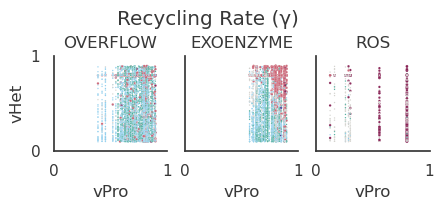

In [92]:
 
#for i,j in [('gammaDp', 'gammaDh'), ('Mp', 'Mh')]:
    
i,j = ('gammaDp', 'gammaDh')
g = sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.95,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    facet_kws=dict(margin_titles=True),
    legend=False,
    height=2, aspect=0.8,
    rasterized=True,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'

).set(
    #xscale='log', yscale='log',
    xlabel=f'vPro',
    ylabel=f'vHet',
    xticks=[0,1],
    yticks=[0,1],
)
plt.suptitle('Recycling Rate (γ)', y=1.04)
save_fpath = os.path.join(save_dpath, 'fig_extended_4_gamma.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)


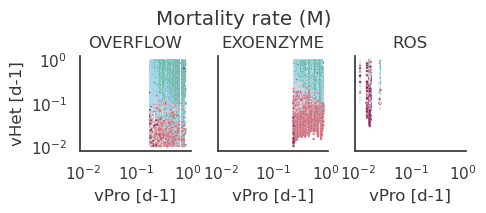

In [93]:
 
#for i,j in [('gammaDp', 'gammaDh'), ('Mp', 'Mh')]:
    
i,j = ('Mp', 'Mh')
g = sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.95,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    facet_kws=dict(margin_titles=True),
    legend=False,
    height=2, aspect=0.8,
    rasterized=True,
    
).set_titles(
    col_template='{col_name}', row_template='{row_name}'

).set(
    xscale='log', yscale='log',
    xlabel=f'vPro [d-1]',
    ylabel=f'vHet [d-1]',
   # xticks=[0,1],
   # yticks=[0,1],
)
plt.suptitle('Mortality rate (M)', y=1.04)
save_fpath = os.path.join(save_dpath, 'fig_extended_4_death.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)


Text(0.5, 1.04, 'Affinity to DIN (KIN)')

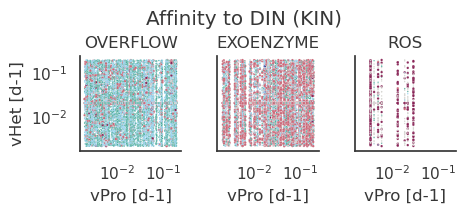

In [88]:
 
#for i,j in [('gammaDp', 'gammaDh'), ('Mp', 'Mh')]:
    
i,j = ('KINp', 'KINh')
g = sns.relplot(
    data=pmparams_df, 
    #common_norm=False,
    x=i, y=j,
    col='model', col_order=morder,
    size='y_pred',  sizes=gsizeson, alpha=0.95,
    hue='y_pred', hue_order=reversed(gorder), palette=reversed(gpalette),
    facet_kws=dict(margin_titles=True),
    legend=False,
    height=2, aspect=0.8,
).set_titles(
    col_template='{col_name}', row_template='{row_name}'

).set(
    xscale='log', yscale='log',
    xlabel=f'vPro [d-1]',
    ylabel=f'vHet [d-1]',
   # xticks=[0,1],
   # yticks=[0,1],
)
plt.suptitle('Affinity to DIN (KIN)', y=1.04)